# Data Cleaning
__"Your model is only as good as the data you give it"__ lays emphasis on why data must be at its best quality before it is used to train a model, hence, data cleaning is an important step to building a good and reliable ML model.
Cleaning image data usually involves cropping the relevant portion of said image and discarding the irrelevant portion.   
If you wish to procure the dataset used to work on this project you can find it [here](https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection)  
__To the code!__

In [2]:
# Import necessary packages.
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
image = cv2.imread(r"C:/Users/ifunanyaScript/Everything/BrainTumour_DiagnosisApp/dataset/tumour/y0.jpg")
image.shape

(348, 287, 3)

In the above tuple, there are y and x dimensions respectively, and the third value represents the RGB colour channel. Each pixel in the image will be represented as an array of three values of RGB accross the entire image, like so __[0, 127, 255]__.

In [12]:
image[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0,

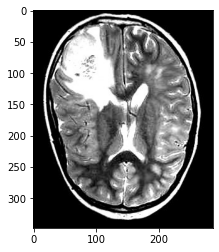

In [16]:
plt.imshow(image)

This is an image of a brain MRI scan.  
For the purpose the prospective model, the relevant portion of the image is the skull containing the brain.  
Apparently there are unnecessary black pixels around the skull. These black spaces would negatively affect the model's performance if not properly addressed. Hence, we need to define a function that can crop this image and get rid of the unnecessary black pixels around the skull.


__NB:__ Black pixels are [0, 0, 0].

In [24]:
def zoomCrop(image):
    """
    First, the function goes through the image array dimension-wise(y, x) and 
    gets the index where the entire y, x dimension is not zero,
    Then, the valid image is cropped using this indices.
    """
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    cropped_image = image[min(y_nonzero):max(y_nonzero), min(x_nonzero):max(x_nonzero)]
    return cropped_image

In [25]:
clean_image = zoomCrop(image)
clean_image.shape

(335, 255, 3)

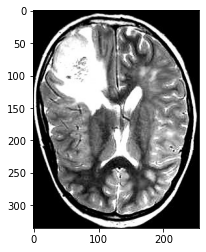

In [26]:
plt.imshow(clean_image)

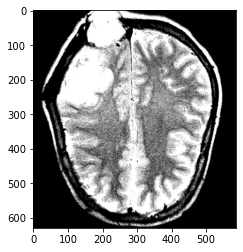

In [27]:
image2 = cv2.imread(r"C:/Users/ifunanyaScript/Everything/BrainTumour_DiagnosisApp/dataset/tumour/y1.jpg")
plt.imshow(image2)

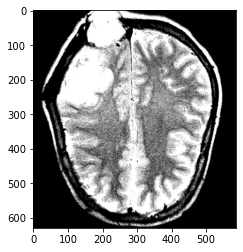

In [28]:
clean_image2 = zoomCrop(image2)
plt.imshow(image2)

Voilà, that did the trick! 
Now that we have a function that does quite the trick, we will write a for loop that iterate over the entire dataset, gets the cropped image and saves it in a different folder. 